<a href="https://colab.research.google.com/github/therudradev/Python_Programming/blob/main/session_14_numpy_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Numpy array vs Python lists

In [3]:
# speed
# list
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]

c = []
import time

start = time.time()
for i in range(len(a)):
  c.append(a[i] + b[i])
print(time.time()-start)

1.6955451965332031


In [4]:
# numpy
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)

start = time.time()
c = a + b
print(time.time()-start)

0.18179845809936523


In [ ]:
3.26/0.06

54.33333333333333

In [4]:
# memory
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)

89095160

In [5]:
a = np.arange(10000000,dtype=np.int8)
sys.getsizeof(a)

10000112

In [ ]:
# convenience

### Advanced Indexing

In [6]:
# Normal Indexing and slicing

a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [7]:
a[1,2]

np.int64(6)

In [8]:
a[1:3,1:3]

array([[ 5,  6],
       [ 9, 10]])

### Fancy indexing

In [9]:
# Fancy Indexing
# jab normal indexing/slicing se baat na bane to fancy indexing use karenge.
# Ex.:- if we need 1st,2nd and 3rd row
# Fancy indexing jo bhi row/column chahiye ek list me dal do.

a[:,[0,2,3]] # 0th, 2nd and 3rd column

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [ ]:
# Boolean Indexing (return 1D array)
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[76, 98, 99, 39],
       [91, 46, 88, 23],
       [45,  6, 83,  1],
       [37, 43, 78, 85],
       [54, 73, 61, 53],
       [40, 93, 85, 77]])

In [ ]:
# find all numbers greater than 50
a[a > 50]

array([76, 98, 99, 91, 88, 83, 78, 85, 54, 73, 61, 53, 93, 85, 77])

In [ ]:
# find out even numbers
a[a % 2 == 0]

array([76, 98, 46, 88,  6, 78, 54, 40])

In [ ]:
# find all numbers greater than 50 and are even
# we use here '&' insted of 'and'.
#  because when ever we work on bollean value use '&' operator for comparision.

a[(a > 50) & (a % 2 == 0)]
a[(a > 50) and (a % 2 == 0)]

ValueError: ignored

In [ ]:
# find all numbers not divisible by 7
a[~(a % 7 == 0)]

array([76, 99, 39, 46, 88, 23, 45,  6, 83,  1, 37, 43, 78, 85, 54, 73, 61,
       53, 40, 93, 85])

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [ ]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [10]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)
print()

# is it possible to add two array of diffrent shape?
print(a+b) # yes

[[0 1 2]
 [3 4 5]]
[[0 1 2]]

[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules (three rules)

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [ ]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [ ]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: ignored

In [ ]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [ ]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [ ]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [ ]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: ignored

In [ ]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: ignored

### Working with mathematical formulas

In [ ]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [ ]:
# sigmoid

def sigmoid(array):
  return 1/(1 + np.exp(-(array)))


a = np.arange(100)

sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [ ]:
# mean squared error

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

In [ ]:
def mse(actual,predicted):
  return np.mean((actual - predicted)**2)

mse(actual,predicted)

500.12

In [ ]:
# binary cross entropy
np.mean((actual - predicted)**2)

500.12

In [ ]:
actual

array([ 5,  3,  9,  7,  3, 36, 49, 28, 20, 40,  2, 23, 29, 18, 30, 23,  7,
       40, 15, 11, 27, 44, 32, 28, 10])

### Working with missing values

In [ ]:
# Working with missing values -> np.nan
# nan and None are not same
# nan is used for missing value

a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [ ]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

### Plotting Graphs

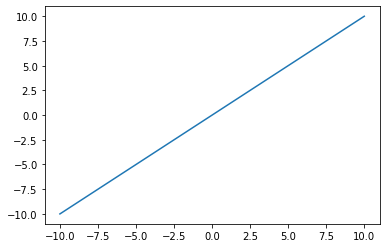

In [ ]:
# plotting a 2D plot
# x = y
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = x

plt.plot(x,y)

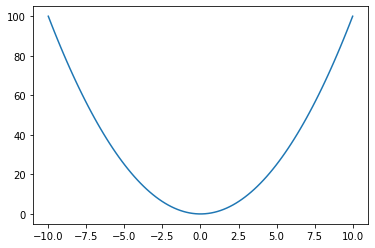

In [ ]:
# y = x^2
x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y)

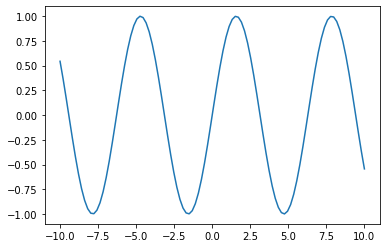

In [ ]:
# y = sin(x)
x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y)

<ipython-input-137-4b3958c08378>:3: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


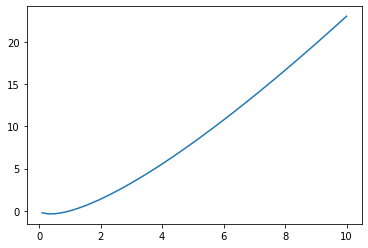

In [ ]:
# y = xlog(x)
x = np.linspace(-10,10,100)
y = x * np.log(x)

plt.plot(x,y)

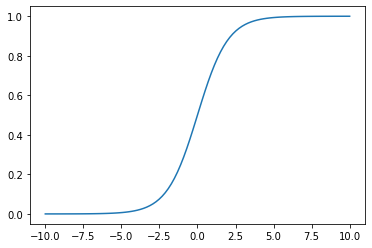

In [ ]:
# sigmoid
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y)

### Meshgrids

# 🔹 What is a Meshgrid?

👉 A **meshgrid** takes **two 1D arrays (x, y)** and produces **two 2D grids (X, Y)** that represent all coordinate pairs in the plane.

* `X` → repeats `x` values across rows.
* `Y` → repeats `y` values across columns.

In [5]:
# 🔹 Example

x = np.array([1, 2, 3])   # x-coordinates
y = np.array([10, 20])    # y-coordinates

X, Y = np.meshgrid(x, y)

print("X:\n", X)
print("Y:\n", Y)

X:
 [[1 2 3]
 [1 2 3]]
Y:
 [[10 10 10]
 [20 20 20]]


👉 Interpretation:

Points generated are: (1,10), (2,10), (3,10), (1,20), (2,20), (3,20)

# 🔹 Why use Meshgrids?

They’re useful for:

* Plotting 2D/3D functions.
* Contour plots, surface plots.
* Creating coordinate systems for simulations.

In [6]:
# 🔹 Example: Function on Meshgrid

import numpy as np

x = np.linspace(-2, 2, 5)   # [-2, -1, 0, 1, 2]
y = np.linspace(-2, 2, 5)

X, Y = np.meshgrid(x, y)

Z = X**2 + Y**2   # function: x² + y²

print("Z:\n", Z)

# ✅ `Z` holds values of function at each grid point.


Z:
 [[8. 5. 4. 5. 8.]
 [5. 2. 1. 2. 5.]
 [4. 1. 0. 1. 4.]
 [5. 2. 1. 2. 5.]
 [8. 5. 4. 5. 8.]]


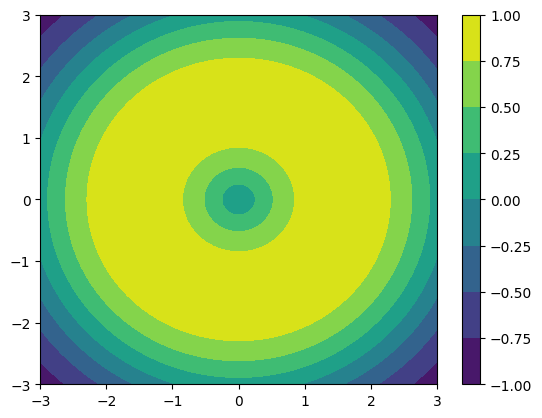

In [7]:
#  🔹 Visualization Example

import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

Z = np.sin(np.sqrt(X**2 + Y**2))

plt.contourf(X, Y, Z, cmap="viridis")
plt.colorbar()
plt.show()

# 👉 This makes a **2D heatmap** of the function.

In [ ]:
# Meshgrids

#  Quick Summary

---

# 🔹 1. NumPy Array vs Python List

| Feature         | **Python List**                                             | **NumPy Array**                                                   |
| --------------- | ----------------------------------------------------------- | ----------------------------------------------------------------- |
| **Type**        | General-purpose container (can store different data types). | Homogeneous (all elements must be of same type, usually numbers). |
| **Performance** | Slower (no fixed type, extra checks).                       | Faster (uses C backend, contiguous memory).                       |
| **Operations**  | Element-wise operations need loops.                         | Vectorized operations (e.g. `a+b` works directly).                |
| **Memory**      | More memory.                                                | Less memory (compact).                                            |
| **Functions**   | Limited math functions.                                     | Rich set of mathematical/statistical functions.                   |

### Example:

```python
import numpy as np

# Python list
lst = [1, 2, 3, 4]
print([x*2 for x in lst])   # [2, 4, 6, 8]

# NumPy array
arr = np.array([1, 2, 3, 4])
print(arr * 2)              # [2 4 6 8]
```

👉 NumPy avoids loops → **much faster**.

---

# 🔹 2. Advanced Indexing

NumPy arrays allow powerful ways of selecting elements beyond just `[i][j]`.

### (a) Slicing (like Python, but more powerful)

```python
arr = np.array([10, 20, 30, 40, 50])
print(arr[1:4])    # [20 30 40]
print(arr[::-1])   # [50 40 30 20 10] (reverse)
```

### (b) Boolean Indexing

Select elements based on conditions.

```python
arr = np.array([1, 2, 3, 4, 5])
print(arr[arr > 2])   # [3 4 5]
```

---

# 🔹 3. Fancy Indexing

👉 Fancy indexing = selecting multiple elements using lists/arrays of indices.

### Example:

```python
arr = np.array([10, 20, 30, 40, 50])
indices = [0, 2, 4]
print(arr[indices])   # [10 30 50]
```

### 2D Fancy Indexing

```python
arr2d = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

print(arr2d[[0, 2], [1, 2]])  
# Picks (0,1)=2 and (2,2)=9 → [2 9]
```

---

# 🔹 4. Broadcasting

👉 **Broadcasting** = NumPy’s ability to perform operations on arrays of different shapes **without copying data**.

Rules:

* Compare shapes from **right to left**.
* If dimensions are equal OR one of them is `1`, they are compatible.

Example:

```python
import numpy as np

a = np.array([1, 2, 3])
b = 2   # scalar

print(a + b)   # [3 4 5]  (scalar b is broadcasted)
```

Matrix example:

```python
A = np.array([[1, 2, 3],
              [4, 5, 6]])
b = np.array([10, 20, 30])

print(A + b)
```

✅ Output:

```
[[11 22 33]
 [14 25 36]]
```

👉 Row `b` is **broadcasted** to match A’s shape.

---

# 🔹 5. Sigmoid Function

👉 Sigmoid squashes any number into range `(0,1)` → often used in ML for probabilities.

Formula:
[
\sigma(x) = \frac{1}{1 + e^{-x}}
]

Example in NumPy:

```python
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-2, -1, 0, 1, 2])
print(sigmoid(x))
```

✅ Output:

```
[0.119 0.269 0.5 0.731 0.881]
```

---

# 🔹 6. Mean Squared Error (MSE)

👉 Measures error between predicted values (`y_pred`) and actual values (`y_true`).

Formula:
[
MSE = \frac{1}{n} \sum (y_{true} - y_{pred})^2
]

Example:

```python
y_true = np.array([1, 2, 3])
y_pred = np.array([1.1, 1.9, 3.2])

mse = np.mean((y_true - y_pred) ** 2)
print("MSE:", mse)
```

✅ Output:

```
MSE: 0.02
```

---

# 🔹 7. Binary Cross Entropy (BCE)

👉 Used as loss function in binary classification (logistic regression, neural nets).

Formula:
[
BCE = - \frac{1}{n} \sum \big[ y \cdot \log(p) + (1-y) \cdot \log(1-p) \big]
]

* `y` = true labels (0 or 1)
* `p` = predicted probabilities (between 0 and 1)

Example:

```python
y_true = np.array([1, 0, 1, 0])            # true labels
y_pred = np.array([0.9, 0.1, 0.8, 0.3])    # predicted probs

bce = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
print("Binary Cross Entropy:", bce)
```

✅ Output:

```
Binary Cross Entropy: 0.164...
```

---

# ✅ Quick Summary

* **Broadcasting** → NumPy automatically expands shapes.
* **Sigmoid** → squashes values to `(0,1)` (probabilities).
* **MSE** → average squared error between predictions and labels.
* **BCE** → loss for binary classification.
* **meshgrid** = creates coordinate grid from x and y.
* Useful for evaluating functions over a grid → especially in plots and ML visualizations.

---
